In [2]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

In [27]:
df = pd.read_csv('data/train_last.csv')

In [28]:
df.head()

,FID,x,y,lineament_dens,drainage_dens,curah_hujan,litologi,slope,elevasi,potensi
0,1,108.1375,-7.4409,0.416742,169.963,250,Batuan_Sedimen,3,5,Baik
1,2,108.1426,-7.4409,0.416742,169.963,250,Batuan_Sedimen,2,6,Baik
2,3,108.1476,-7.4409,0.443628,169.963,250,Batuan_Sedimen,2,6,Baik
3,4,108.1526,-7.4409,0.470515,169.963,250,Batuan_Sedimen,1,6,Baik
4,5,108.1576,-7.4409,0.497401,169.963,250,Batuan_Sedimen,2,6,Baik


In [29]:
df.columns

Index(['FID', 'x', 'y', 'lineament_dens', 'drainage_dens', 'curah_hujan',
       'litologi', 'slope', 'elevasi', 'potensi'],
      dtype='object')

In [30]:
# Label Encode
mapping = { 'Baik': 1, 'Buruk': 0}
df['potensi'] = df['potensi'].map(mapping)

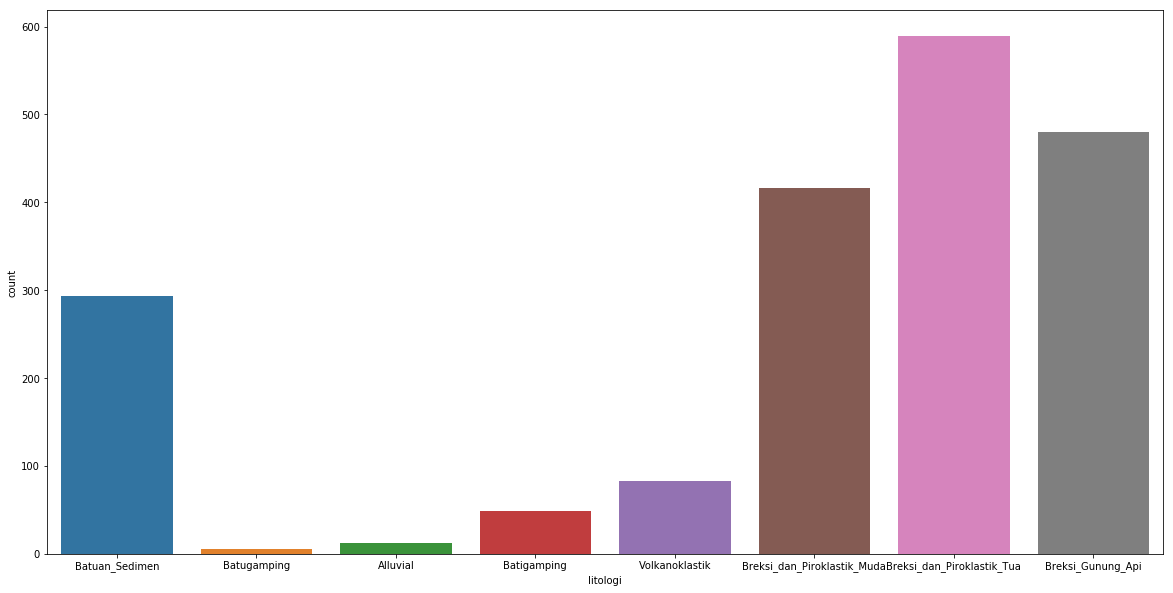

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x='litologi', data=df)

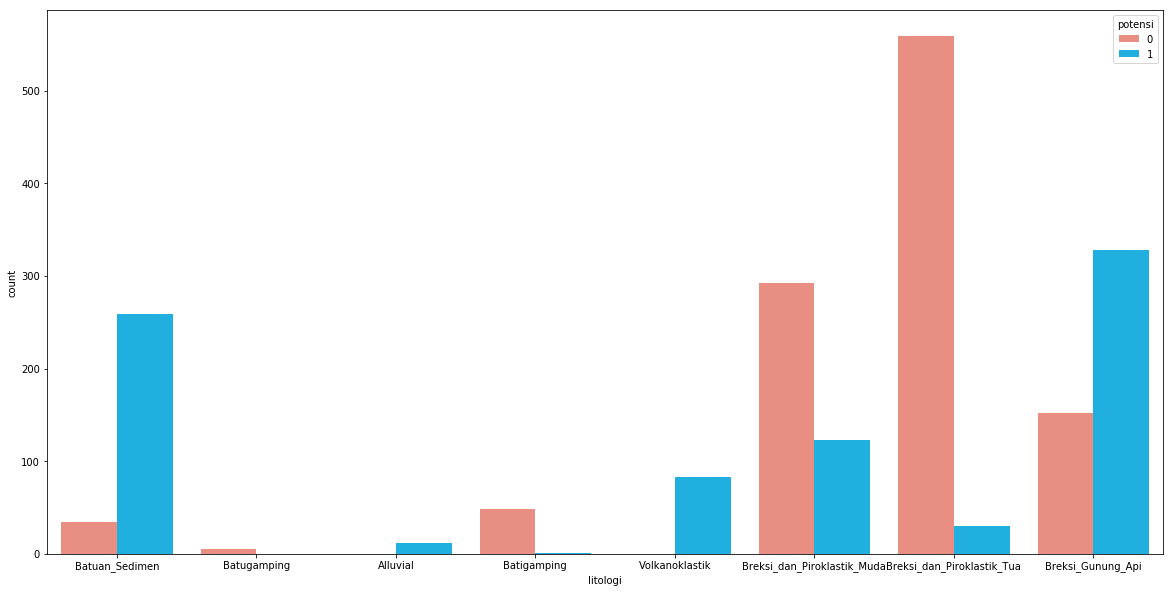

In [40]:
colours = ["salmon", "deepskyblue"]
plt.figure(figsize=(20,10))
sns.countplot(x='litologi', data=df, hue='potensi', palette=colours)

In [47]:
for i in (df.columns[3:]):
    print(df[i].value_counts())

0.013443    199
0.470515    113
0.497401    100
0.282309     88
0.416742     86
0.443628     84
0.362969     83
0.309195     80
0.336082     80
0.389855     76
0.040330     74
0.255422     73
0.524288     73
0.551174     71
0.578061     57
0.201649     55
0.067216     55
0.228536     54
0.658721     46
0.094103     45
0.631834     45
0.120990     44
0.604948     43
0.685607     41
0.174763     41
0.147876     39
0.712494     30
0.766267     13
0.847061     11
0.739380     10
0.793153      9
0.820040      9
Name: lineament_dens, dtype: int64
209.9543    403
189.9586    382
169.9630    252
229.9499    164
149.9673    150
269.9412    143
289.9369    114
249.9456    105
129.9717     62
309.9325     52
109.9761     31
349.9238     28
329.9282     28
369.9194     13
Name: drainage_dens, dtype: int64
350    1234
250     693
Name: curah_hujan, dtype: int64
Breksi_dan_Piroklastik_Tua     589
Breksi_Gunung_Api              480
Breksi_dan_Piroklastik_Muda    416
Batuan_Sedimen                 293

In [12]:
# One Hot Encoding : Change category data into binary
ohe = pd.get_dummies(df[['litologi']])
df = pd.concat([df, ohe], axis=1, join='inner')
df.head()

,FID,x,y,lineament_dens,drainage_dens,curah_hujan,litologi,slope,elevasi,potensi,litologi_Alluvial,litologi_Batigamping,litologi_Batuan_Sedimen,litologi_Batugamping,litologi_Breksi_Gunung_Api,litologi_Breksi_dan_Piroklastik_Muda,litologi_Breksi_dan_Piroklastik_Tua,litologi_Volkanoklastik
0,1,108.1375,-7.4409,0.416742,169.963,250,Batuan_Sedimen,3,5,1,0,0,1,0,0,0,0,0
1,2,108.1426,-7.4409,0.416742,169.963,250,Batuan_Sedimen,2,6,1,0,0,1,0,0,0,0,0
2,3,108.1476,-7.4409,0.443628,169.963,250,Batuan_Sedimen,2,6,1,0,0,1,0,0,0,0,0
3,4,108.1526,-7.4409,0.470515,169.963,250,Batuan_Sedimen,1,6,1,0,0,1,0,0,0,0,0
4,5,108.1576,-7.4409,0.497401,169.963,250,Batuan_Sedimen,2,6,1,0,0,1,0,0,0,0,0


In [13]:
df.columns

Index(['FID', 'x', 'y', 'lineament_dens', 'drainage_dens', 'curah_hujan',
       'litologi', 'slope', 'elevasi', 'potensi', 'litologi_Alluvial',
       'litologi_Batigamping', 'litologi_Batuan_Sedimen',
       'litologi_Batugamping', 'litologi_Breksi_Gunung_Api',
       'litologi_Breksi_dan_Piroklastik_Muda',
       'litologi_Breksi_dan_Piroklastik_Tua', 'litologi_Volkanoklastik'],
      dtype='object')

In [14]:
df[['lineament_dens', 'drainage_dens', 'curah_hujan',
       'litologi', 'slope', 'elevasi', 'potensi', 'litologi_Alluvial',
       'litologi_Batigamping', 'litologi_Batuan_Sedimen',
       'litologi_Batugamping', 'litologi_Breksi_Gunung_Api',
       'litologi_Breksi_dan_Piroklastik_Muda',
       'litologi_Breksi_dan_Piroklastik_Tua', 'litologi_Volkanoklastik']].corr()

,lineament_dens,drainage_dens,curah_hujan,slope,elevasi,potensi,litologi_Alluvial,litologi_Batigamping,litologi_Batuan_Sedimen,litologi_Batugamping,litologi_Breksi_Gunung_Api,litologi_Breksi_dan_Piroklastik_Muda,litologi_Breksi_dan_Piroklastik_Tua,litologi_Volkanoklastik
lineament_dens,1.000000,0.480039,-0.295441,0.636080,0.346633,-0.206034,0.113163,0.220200,0.304254,0.054734,-0.662506,-0.154407,0.347980,0.168187
drainage_dens,0.480039,1.000000,0.032958,0.640633,0.555064,-0.096975,-0.029685,-0.026093,0.044670,-0.026417,-0.293626,-0.230362,0.233247,0.522421
curah_hujan,-0.295441,0.032958,1.000000,-0.031614,0.296243,-0.415337,-0.105632,-0.215547,-0.565065,-0.068061,0.376606,-0.085146,0.386885,-0.283106
slope,0.636080,0.640633,-0.031614,1.000000,0.681431,-0.158157,0.006188,0.000609,0.076302,0.032249,-0.409539,-0.249578,0.414375,0.292027
elevasi,0.346633,0.555064,0.296243,0.681431,1.000000,-0.247060,-0.071557,-0.123810,-0.173539,-0.023369,-0.190878,-0.014110,0.338864,0.102793
potensi,-0.206034,-0.096975,-0.415337,-0.158157,-0.247060,1.000000,0.090431,-0.134746,0.384597,-0.044648,0.289948,-0.146275,-0.512605,0.242364
litologi_Alluvial,0.113163,-0.029685,-0.105632,0.006188,-0.071557,0.090431,1.000000,-0.012787,-0.033521,-0.004038,-0.045592,-0.041536,-0.052521,-0.016794
litologi_Batigamping,0.220200,-0.026093,-0.215547,0.000609,-0.123810,-0.134746,-0.012787,1.000000,-0.068400,-0.008239,-0.093033,-0.084755,-0.107172,-0.034270
litologi_Batuan_Sedimen,0.304254,0.044670,-0.565065,0.076302,-0.173539,0.384597,-0.033521,-0.068400,1.000000,-0.021598,-0.243890,-0.222189,-0.280955,-0.089839
litologi_Batugamping,0.054734,-0.026417,-0.068061,0.032249,-0.023369,-0.044648,-0.004038,-0.008239,-0.021598,1.000000,-0.029376,-0.026762,-0.033841,-0.010821


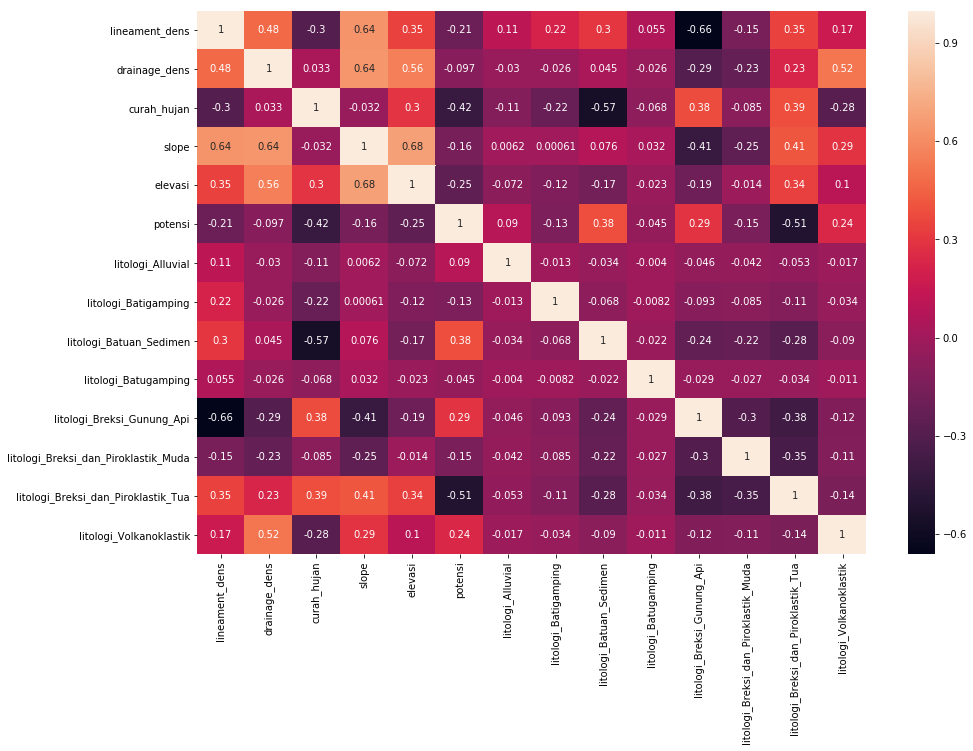

In [15]:
# Pearson corelation
plt.figure(figsize=(15,10))
sns.heatmap(df[['lineament_dens', 'drainage_dens', 'curah_hujan',
       'litologi', 'slope', 'elevasi', 'potensi', 'litologi_Alluvial',
       'litologi_Batigamping', 'litologi_Batuan_Sedimen',
       'litologi_Batugamping', 'litologi_Breksi_Gunung_Api',
       'litologi_Breksi_dan_Piroklastik_Muda',
       'litologi_Breksi_dan_Piroklastik_Tua', 'litologi_Volkanoklastik']].corr(), annot=True)

In [16]:
df.shape

(1927, 18)

In [17]:
df.isnull().sum()

FID                                     0
x                                       0
y                                       0
lineament_dens                          0
drainage_dens                           0
curah_hujan                             0
litologi                                0
slope                                   0
elevasi                                 0
potensi                                 0
litologi_Alluvial                       0
litologi_Batigamping                    0
litologi_Batuan_Sedimen                 0
litologi_Batugamping                    0
litologi_Breksi_Gunung_Api              0
litologi_Breksi_dan_Piroklastik_Muda    0
litologi_Breksi_dan_Piroklastik_Tua     0
litologi_Volkanoklastik                 0
dtype: int64

In [18]:
df.potensi.value_counts()

0    1091
1     836
Name: potensi, dtype: int64

In [19]:
df.columns

Index(['FID', 'x', 'y', 'lineament_dens', 'drainage_dens', 'curah_hujan',
       'litologi', 'slope', 'elevasi', 'potensi', 'litologi_Alluvial',
       'litologi_Batigamping', 'litologi_Batuan_Sedimen',
       'litologi_Batugamping', 'litologi_Breksi_Gunung_Api',
       'litologi_Breksi_dan_Piroklastik_Muda',
       'litologi_Breksi_dan_Piroklastik_Tua', 'litologi_Volkanoklastik'],
      dtype='object')

In [20]:
df = df[['FID', 'x', 'y', 'lineament_dens', 'drainage_dens', 'curah_hujan',
       'slope', 'elevasi',  'litologi_Alluvial',
       'litologi_Batigamping', 'litologi_Batuan_Sedimen',
       'litologi_Batugamping', 'litologi_Breksi_Gunung_Api',
       'litologi_Breksi_dan_Piroklastik_Muda',
       'litologi_Breksi_dan_Piroklastik_Tua', 'litologi_Volkanoklastik','potensi']]
df.head(1)

,FID,x,y,lineament_dens,drainage_dens,curah_hujan,slope,elevasi,litologi_Alluvial,litologi_Batigamping,litologi_Batuan_Sedimen,litologi_Batugamping,litologi_Breksi_Gunung_Api,litologi_Breksi_dan_Piroklastik_Muda,litologi_Breksi_dan_Piroklastik_Tua,litologi_Volkanoklastik,potensi
0,1,108.1375,-7.4409,0.416742,169.963,250,3,5,0,0,1,0,0,0,0,0,1


C:\Users\citra\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


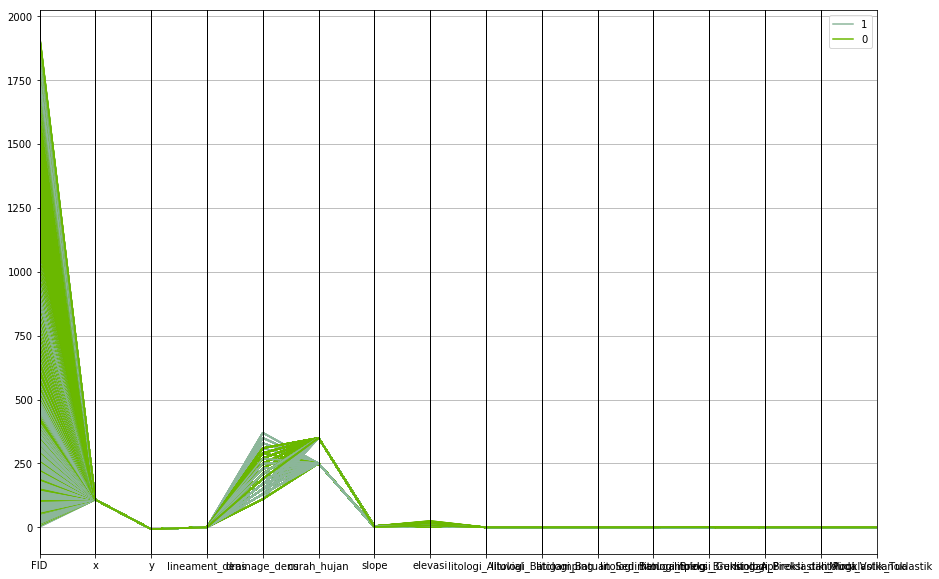

In [21]:
plt.figure(figsize=(15,10))
parallel_coordinates(df, "potensi");
plt.show()

In [18]:
df.to_csv('preprop_data.csv', index=False)

In [ ]:
# preprocess test data

In [23]:
df_test = pd.read_csv('data/test_last.csv')
df_test.head(1)

,OBJECTID,x,y,lineament_dens,drainage_dens,curah_hujan,litologi,slope,elevasi
0,1,108.0073,-7.48126,0.201649,209.9543,250,Breksi_dan_Piroklastik_Tua,2,4


In [24]:
# one hot encode
ohe = pd.get_dummies(df_test[['litologi']])
df_test = pd.concat([df_test, ohe], axis=1, join='inner')
df_test.head()

,OBJECTID,x,y,lineament_dens,drainage_dens,curah_hujan,litologi,slope,elevasi,litologi_Alluvial,litologi_Batigamping,litologi_Batuan_Sedimen,litologi_Batugamping,litologi_Breksi_Gunung_Api,litologi_Breksi_dan_Piroklastik_Muda,litologi_Breksi_dan_Piroklastik_Tua,litologi_Volkanoklastik
0,1,108.0073,-7.48126,0.201649,209.9543,250,Breksi_dan_Piroklastik_Tua,2,4,0,0,0,0,0,0,1,0
1,2,108.0124,-7.48126,0.228536,189.9586,250,Breksi_dan_Piroklastik_Tua,3,4,0,0,0,0,0,0,1,0
2,3,108.0174,-7.48126,0.282309,169.9630,250,Breksi_dan_Piroklastik_Tua,2,4,0,0,0,0,0,0,1,0
3,4,108.0224,-7.48126,0.309195,169.9630,250,Breksi_dan_Piroklastik_Tua,1,3,0,0,0,0,0,0,1,0
4,5,108.0274,-7.48126,0.336082,169.9630,250,Breksi_dan_Piroklastik_Tua,3,3,0,0,0,0,0,0,1,0


In [25]:
df_test = df_test.drop(['litologi'],axis=1)

In [26]:
df_test.head()

,OBJECTID,x,y,lineament_dens,drainage_dens,curah_hujan,slope,elevasi,litologi_Alluvial,litologi_Batigamping,litologi_Batuan_Sedimen,litologi_Batugamping,litologi_Breksi_Gunung_Api,litologi_Breksi_dan_Piroklastik_Muda,litologi_Breksi_dan_Piroklastik_Tua,litologi_Volkanoklastik
0,1,108.0073,-7.48126,0.201649,209.9543,250,2,4,0,0,0,0,0,0,1,0
1,2,108.0124,-7.48126,0.228536,189.9586,250,3,4,0,0,0,0,0,0,1,0
2,3,108.0174,-7.48126,0.282309,169.9630,250,2,4,0,0,0,0,0,0,1,0
3,4,108.0224,-7.48126,0.309195,169.9630,250,1,3,0,0,0,0,0,0,1,0
4,5,108.0274,-7.48126,0.336082,169.9630,250,3,3,0,0,0,0,0,0,1,0


In [24]:
df_test.to_csv('test_data.csv')